<h1> Module 9 Submission </h1>
<h2> Machine Learning and Data Mining</h2>
<h3 style="margin-top: 10px;" > Stephen Eades </h3>

<p> 7/20/2020 </p>

<h4> Sklearn </h4>

<p>In this module, you will write one Python notebooks to create required outputs. You will also participate in module 9 forum discussion.
    <br>
    <br>

<ol>
    <li>Watch the lecture videos and fully understand the lecture notebook</li>
    <li>Analyze the “app_usage” data set by following the example in the lecture</li>
    <li>Create the heat map as in the attached “heatmap.png”.</li>
    <li>Display the R and adjusted R of each model. Make sure that the features are added in the descending order of their individual R squared values. Create an output as in the attached “models.png”.</li>
    <li>Read this (http://abbottanalytics.blogspot.com/2004/12/find-correlated-variables-prior-to.html (Links to an external site.)) and improve your model by removing some features. The answer may vary. Write in your notebook to explain what features you removed and why you remove those features.</li>
    <li>Find a model with 3 features and reasonable R squared value</li>
    <li>Summarize the feature selection process in your notebook</li>
    <br>
</ol>

<strong>Submission:</strong> You will export your notebook to both .html and .py formats. You will submit the following file to Blackboard. In your html file, you should include only required outputs of your python script without error messages.

<ol>
    <li> Firstname_Lastname_sklearn.zip (zip the .html and .ipynb files)  </li>
</ol>

<strong>Attachments:</strong> 

<ol>
    <li>heatmap.png: Sample correlation map</li>
    <li>models.png: Sample output of R and adjusted R of all models.</li>
    <li>App_usage.csvPreview the document: VPN access data set</li>
    <li>Scikit_learn_assignment_template.ipynb: The assignment template</li>
</ol>

In [1]:
# Import the needed packages
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Read in app_usage data into vpn_df
csv = pd.read_csv("app_usage.csv")
vpn_df= pd.DataFrame(csv)
vpn_df

,CRM,CloudDrive,ERP,Expenses,HR1,HR2,ITOps,OTHER,Recruiting,Webmail,RemoteAccess
0,49,99,17,38,0,0,18,144,33,141,283
1,107,148,28,54,0,0,38,188,30,213,430
2,639,796,221,216,0,0,133,1175,297,579,732
3,653,767,203,191,0,0,139,1475,308,549,738
4,670,738,196,140,0,0,128,1111,305,678,781
...,...,...,...,...,...,...,...,...,...,...,...
86,770,856,212,278,116,832,153,424,285,717,805
87,699,883,209,191,121,649,134,424,273,644,774
88,738,773,227,171,104,492,111,384,306,730,859
89,749,824,188,146,98,442,120,305,645,717,898


In [3]:
# RemoteAccess is the target, we will build a model that 
# takes all other columns as X to predict remote VPN usage

# Look at the shape of the dataframe
print(vpn_df.shape)

# Look at the column names
print(vpn_df.columns)

# Show the first 5 records
print(vpn_df.head(5))

(91, 11)
Index(['CRM', 'CloudDrive', 'ERP', 'Expenses', 'HR1', 'HR2', 'ITOps', 'OTHER',
       'Recruiting', 'Webmail', 'RemoteAccess'],
      dtype='object')
   CRM  CloudDrive  ERP  Expenses  HR1  HR2  ITOps  OTHER  Recruiting  \
0   49          99   17        38    0    0     18    144          33   
1  107         148   28        54    0    0     38    188          30   
2  639         796  221       216    0    0    133   1175         297   
3  653         767  203       191    0    0    139   1475         308   
4  670         738  196       140    0    0    128   1111         305   

   Webmail  RemoteAccess  
0      141           283  
1      213           430  
2      579           732  
3      549           738  
4      678           781  


[Text(0, 0.5, 'Numbers'), Text(0.5, 0, 'VPN Access')]

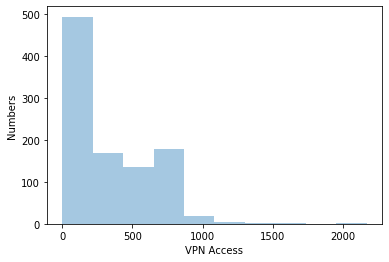

In [5]:
# Visualize data
list_to_plot=[]
for col in vpn_df.columns:
    for val in vpn_df[col]:
        list_to_plot.append(val)
        
ax = sns.distplot(list_to_plot, bins=10, kde=False)
ax.set(xlabel="VPN Access", ylabel="Numbers")

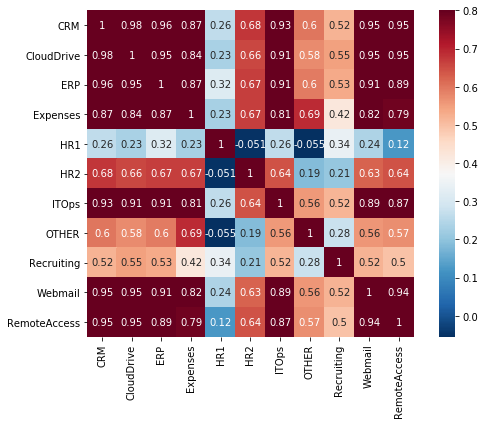

In [6]:
# Correlation heat map
corrmat = vpn_df.corr()

f, ax = plt.subplots(figsize=(8,6))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True, cmap="RdBu_r")

f.tight_layout()

In [7]:
# We determine that this is supervised machine learning problem
# Linear Regression can be a good model
from sklearn import linear_model

In [8]:
# The function takes X, y and retrun the trained model and R squared
def train_model(X,y):
    model = linear_model.LinearRegression()
    model.fit(X, y)
    R_2 = model.score(X,y)
    return model, R_2
# Create a function to calculate Adjusted R_square
# n is the number of sample, p is the number features
def cal_adjusted_R(R_2, p, n):
    R_adjusted = R_2-(1-R_2)*(p/(n-p-1))
    return R_adjusted

In [9]:
# R_2_array stores the R squared of all the features
R_2_array = np.array([])

# Calcuate the R_squared 
for col_name in vpn_df.columns:
    if col_name == 'RemoteAccess':
        continue
    else:    
        
        X_feature = vpn_df[[(col_name)]]
        target = vpn_df[['RemoteAccess']]
        model, R_2 = train_model(X_feature,target)
        print(col_name + " : ", R_2)
        R_2_array = np.append(R_2_array, R_2)      
           
sorted_R_2_index = np.argsort(R_2_array)[::-1]       

print("The order of index numbers are : \t", sorted_R_2_index)

CRM :  0.9030603942302714
CloudDrive :  0.8932567722424455
ERP :  0.7904301126742891
Expenses :  0.6232665636003503
HR1 :  0.015308027253735923
HR2 :  0.41428585591006056
ITOps :  0.7566204951691912
OTHER :  0.3268756160241403
Recruiting :  0.24953322751414383
Webmail :  0.8847819743305698
The order of index numbers are : 	 [0 1 9 2 6 3 5 7 8 4]


In [10]:
# Gradually build up our model and add R squared and adjusted R to the output
for i in range(len(sorted_R_2_index)):
    
    # The selected_features should be the top i most associated features
    selected_features = []
    
    # Take the top 1 to ith features as X
    for j in range(i+1):
        
            # Append a new column based on the sorted R value
            selected_features.append(vpn_df.columns[sorted_R_2_index[j]])
            
    # Verify we got the right features
    print(selected_features)
    
    # X
    X_feature = vpn_df[selected_features]
    
    # y
    target = vpn_df[['RemoteAccess']]
    
    # Train the model
    model, R_2 = train_model(X_feature, target)
    
    # Calculate adjusted R
    R_adjusted = cal_adjusted_R(R_2, i+1, vpn_df.shape[0])

    print("R2: ", R_2, "\t Ajusted R2: ", R_adjusted, "\n")

['CRM']
R2:  0.9030603942302714 	 Ajusted R2:  0.901971185176679 

['CRM', 'CloudDrive']
R2:  0.9074773125587101 	 Ajusted R2:  0.9053745242077718 

['CRM', 'CloudDrive', 'Webmail']
R2:  0.9169720723523399 	 Ajusted R2:  0.9141090403644896 

['CRM', 'CloudDrive', 'Webmail', 'ERP']
R2:  0.9243104820063341 	 Ajusted R2:  0.9207900393089543 

['CRM', 'CloudDrive', 'Webmail', 'ERP', 'ITOps']
R2:  0.9245040709947892 	 Ajusted R2:  0.9200631339944826 

['CRM', 'CloudDrive', 'Webmail', 'ERP', 'ITOps', 'Expenses']
R2:  0.9261180813990765 	 Ajusted R2:  0.9208408014990105 

['CRM', 'CloudDrive', 'Webmail', 'ERP', 'ITOps', 'Expenses', 'HR2']
R2:  0.9268374090661093 	 Ajusted R2:  0.9206670700716848 

['CRM', 'CloudDrive', 'Webmail', 'ERP', 'ITOps', 'Expenses', 'HR2', 'OTHER']
R2:  0.9303318238786104 	 Ajusted R2:  0.9235349286472553 

['CRM', 'CloudDrive', 'Webmail', 'ERP', 'ITOps', 'Expenses', 'HR2', 'OTHER', 'Recruiting']
R2:  0.9305073579887443 	 Ajusted R2:  0.922785953320827 

['CRM', 'Clou

In [11]:
# Build the model with all the features

y = vpn_df['RemoteAccess']
X = vpn_df.drop('RemoteAccess', 1)

from sklearn import linear_model

# Create a linear regression model from linear_model package 
model=linear_model.LinearRegression()

# Train the model with our data (X, y)
model.fit(X,y)

# Display the parameters
print('Intercept: \n', model.intercept_)
print('Coefficients: \n', model.coef_)

# Use R squared to see how much variation is explained by the trained model
print('R_squared: \n', model.score(X,y))

Intercept: 
 168.76868273498133
Coefficients: 
 [ 0.78030166  0.02552479 -0.3614915  -0.22380617 -0.14305536 -0.02601244
 -0.14498212 -0.01503002  0.02986555  0.32726658]
R_squared: 
 0.9392847759700534


In [12]:
# Should we reduce the number of features? 
from IPython.display import IFrame
IFrame('http://abbottanalytics.blogspot.com/2004/12/find-correlated-variables-prior-to.html', width=1200, height=300)

In [13]:
# Modify the following code to remove the features you feel necessary
y = vpn_df['RemoteAccess']
X = vpn_df.drop(['RemoteAccess', 'ERP', 'Expenses', 'HR1', 'HR2', 'OTHER', 'Recruiting', 'ITOps'], 1)
features_kept = ['CRM', 'CloudDrive', 'Webmail']

# We use Lasso to further penalize models with more features
from sklearn.linear_model import Lasso

# In Lasso, the score is still R squared 
best_score = 0

# Lasso has a parameter alpha used to adjust the level of penalizing the 
# number of features. A bigger alpha will produce less features. 
# We initiate the best alpha to 0 
best_alpha = 0 

# Fine tune alpha to find the model we need 
for alpha in np.linspace(1,0.2, 1000):
    
    # Create a linear regression (Lasso) model from linear_model package 
    model=Lasso(alpha=alpha,normalize=True, max_iter=1e5)

    # Train the model with our data (X, y)
    model.fit(X,y)

    X_feature = vpn_df[features_kept]
    target = vpn_df[['RemoteAccess']]
    model, R_2 = train_model(X_feature, target)

best_alpha = alpha
best_score = R_2
            
print("The best R of my 3-feature model is:\t\t", best_score)
print("The alpha I used in Lasso to find my model is: \t", best_alpha)

# Use R squared to see how much variation is explained by the trained model
print('R_squared: \n', model.score(X,y))

The best R of my 3-feature model is:		 0.9169720723523399
The alpha I used in Lasso to find my model is: 	 0.2
R_squared: 
 0.9169720723523399


### Summarize how you eliminated some features. Which 3 features are in your model. Compare the R squared value of your model with one using all the features, explain why your model is a reasonably better model. 

In [14]:
# Summary
print("My summary: First, the idea is to remove values that are highly correlated. We only need one of those values "
     + "in our model for it to be reflected. Based on this, I removed all features that had high correlations and that "
     + "already had representation through other features. The features CRM, CloudDrive, and Webmail all provided the "
     + "values necessary and including the other features was, in a sense, redundant for the model. "
     + "Using this process, we find that the best alpha and R of the 3 feature model occurred with the previously stated "
     + "features, and has a R of 0.91697 and an alpha of 0.2.")
      
print("The 3 features in my model are:  ", features_kept)

My summary: First, the idea is to remove values that are highly correlated. We only need one of those values in our model for it to be reflected. Based on this, I removed all features that had high correlations and that already had representation through other features. The features CRM, CloudDrive, and Webmail all provided the values necessary and including the other features was, in a sense, redundant for the model. Using this process, we find that the best alpha and R of the 3 feature model occurred with the previously stated features, and has a R of 0.91697 and an alpha of 0.2.
The 3 features in my model are:   ['CRM', 'CloudDrive', 'Webmail']
